<a href="https://colab.research.google.com/github/deena19liebert/Deep-Learning-Techniques-Lab/blob/main/FaceRecognitionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classes: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.3360 - loss: 1.8460 - val_accuracy: 0.4612 - val_loss: 1.6001
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.3948 - loss: 1.7332 - val_accuracy: 0.4612 - val_loss: 1.6113
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.3923 - loss: 1.7070 - val_accuracy: 0.4612 - val_loss: 1.6292
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.3984 - loss: 1.7002 - val_accuracy: 0.4612 - val_loss: 1.6209
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.3730 - loss: 1.7357 - val_accuracy: 0.4612 - val_loss: 1.6008
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.4113 - loss: 1.6978 - val_accuracy: 0.4612 - val_loss: 1.6168
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.4246 - loss: 1.6895 - val_accuracy: 0.4612 - val_loss: 1.5928
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.3964 - loss: 1.7106 - val_accuracy: 0.4612 - v

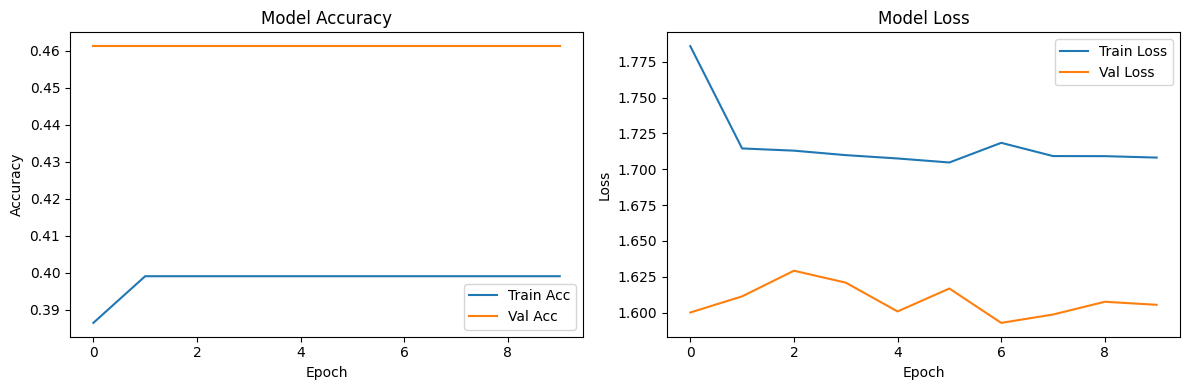

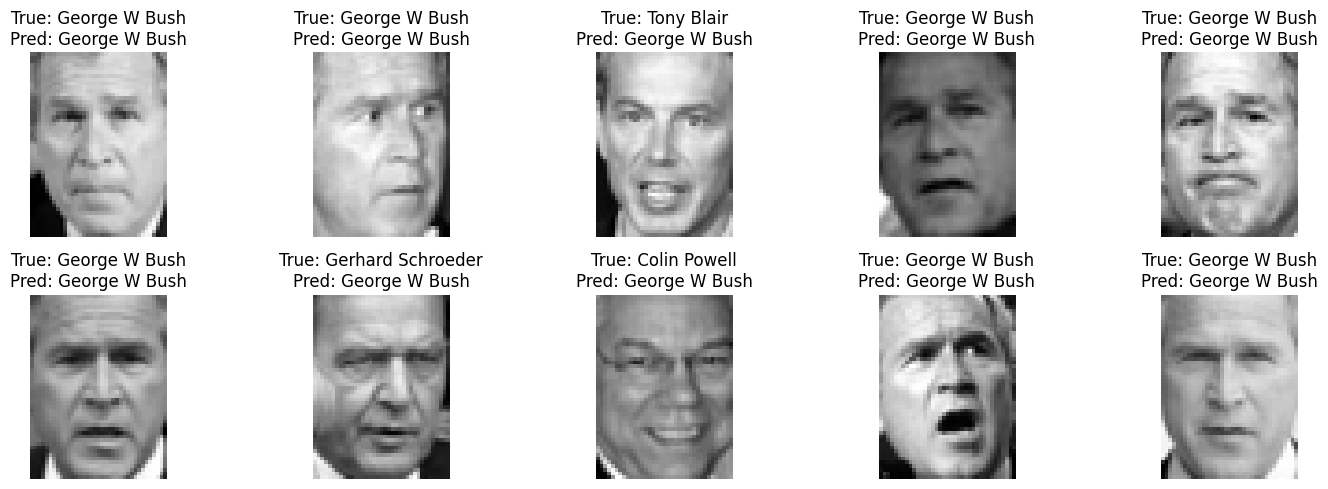

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = faces.images
y = faces.target
target_names = faces.target_names
print("Classes:", target_names)

# Step 4: Preprocess the data
X = X / 255.0  # Normalize
X = X[..., np.newaxis]  # Add channel dimension: (samples, height, width, 1)
y_encoded = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 5: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test))

# Step 7: Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Step 8: Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 9: Visualize predictions
n = 10
plt.figure(figsize=(15, 5))
for i in range(n):
    img = X_test[i]
    true_label = target_names[np.argmax(y_test[i])]
    pred = model.predict(img.reshape(1, *X.shape[1:]), verbose=0)
    pred_label = target_names[np.argmax(pred)]

    plt.subplot(2, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
